# 09wk-1: 중간고사

최규빈  
2023-10-30

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/09wk-1-mid.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import * 
#---#
import PIL
import io 
import requests
import cv2 

# 1. 에너지사용량 – 80점

아래는 2019년 서울의 에너지사용량을 불러오는 예시코드이다.

In [4]:
pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv')

에너지 사용량은 2018년부터 2021년까지의 기간 동안 서울, 부산 등 여러
지역에 대해 정리되어 있으며, 아래 주소 형식으로 저장되어 있다.

    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
    ...
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv

아래의 `url`, `prov`를 참고하여 모든 자료를 불러온 뒤 `pd.concat()`을
이용하여 하나의 df로 합쳐라.

In [5]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

의미상 숫자형이지만 문자형으로 입력이된 자료를 모두 전처리하고, 아래의
딕셔너리를 이용하여 열의 이름을 변환하라.

In [46]:
name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

올바르게 정리된 데이터프레임의 예시는 아래와 같다.

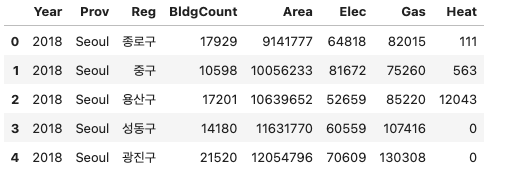

## `(1)` 에너지 사용 추세 – 10점

2018년부터 2021년까지 에너지사용량을 dot-connected plot으로 시각화 하라.

**시각화 예시**

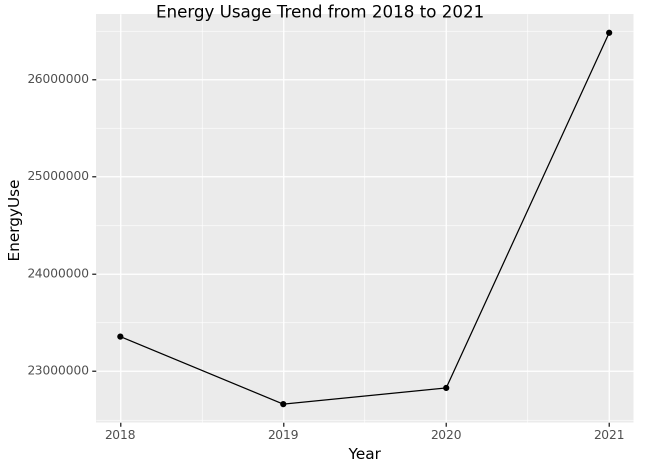

**세부지침**

`1`. plotnine으로 생성된 `fig`[1]에 `.draw()`메소드를 사용하여
`matplotlib.figure.Figure` 자료형으로 변환할것

`2`. 변환된 자료형에 `fig.suptitle()` method를 사용하여 제목을 설정할것.

## `(2)` 에너지 종류별 사용 추세 – 10점

2018년부터 2021년까지 에너지사용량을 dot-connected plot으로 시각화 하라.
에너지의 유형은 색상으로 구분하라.

**시각화 예시**

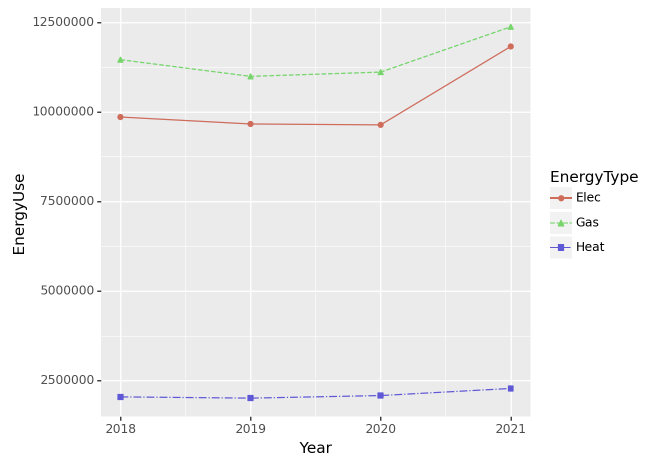

**세부지침**

`1` `geom_point`의 color와 shape을 `EneryType`으로 설정할 것.

`2` `geom_line`의 color와 linetype을 `EneryType`으로 설정할 것

## `(3)` 2020년 대비 2021년의 전기에너지 사용량 증가 – 20점

2020년 대비 2021년의 전기에너지 사용량이 증가한 상위 5개의 지역을 아래와
같이 시각화하라.

**시각화 예시**

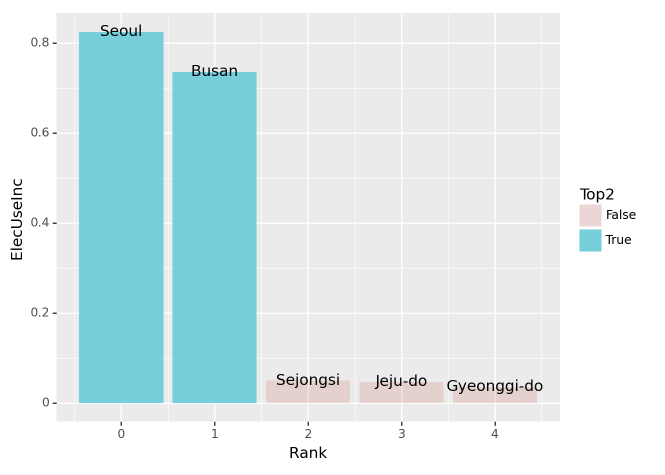

**세부지침**

`1`. 2020년 대비 2021년의 전기에너지 사용 증가량은 아래와 같이 구한다.

$$\text{서울의 전기에너지 사용 증가량} = \frac{\text{2021년 강남구의 전기에너지 사용량} + \dots + \text{2021년 중랑구의 전기에너지 사용량}}{\text{2020년 강남구의 전기에너지 사용량} + \dots + \text{2020년 중랑구의 전기에너지 사용량}}$$

`2`. 전기에너지의 사용량이 증가한 상위5개의 지역 중 가장 많이 증가한
2개의 지역은 색깔과 투명도로 하이라이팅 한다. (구체적 코드는 hint를
참고할 것)

**힌트**

`-` 정리된 자료의 형태는 아래와 같아야 한다.

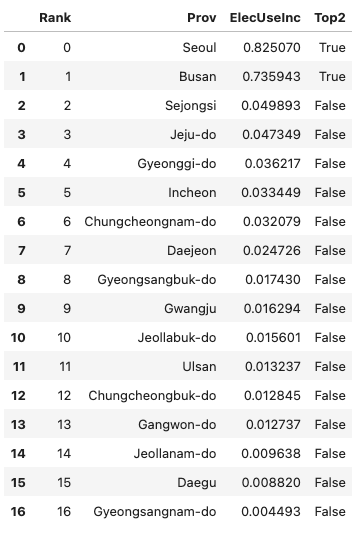

`-` 그림안에 text를 넣기위해서 `geom_text`를 시용한다. 위의 데이터가
정리되었다는 전제하에 구체적인 시각화 코드는 아래와 같다.

``` python
fig = ggplot(tidydata.query('Rank<5'))
col = geom_col(aes(x='Rank',y='ElecUseInc',fill='Top2',alpha='Top2'))
text = geom_text(aes(x='Rank',y='ElecUseInc',label='Prov'))
fig + col + text + scale_alpha_manual(values={True: 1, False: 0.2})
```

## `(4)` 건물당 에너지 소비량: 연도별 상위 15구 비교 – 20점

건물당 에너지소비량이 가장 큰 15개의 구를 연도별로 시각화하라.

**시각화 예시**

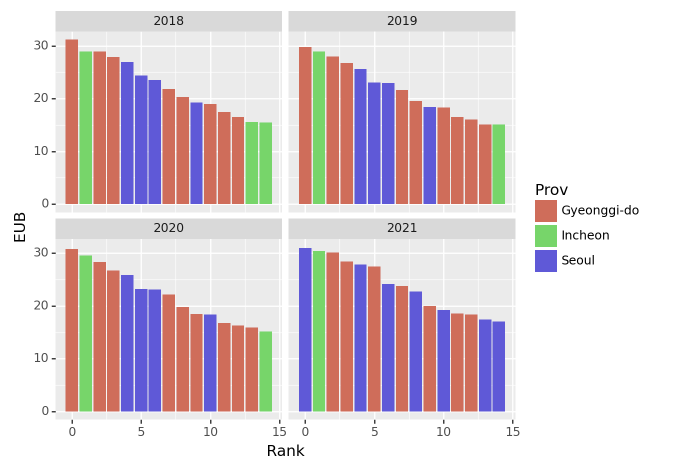

**세부지침**

`1`. 건물당 에너지 사용량(=EUB)을 아래와 같은 방식으로 구할 것

$$\text{EUB}_{강남구,2018}=\frac{\text{강남구의 2018년도 전기에너지 사용량}+ \text{강남구의 2018년도 도시가스 사용량} +\text{강남구의 2018년도 지역난방 사용량}}{\text{강남구의 2018년도 건물동수}}$$

`2`. 연도별로 EUB가 높은 15개의 구를 정렬할 것. (따라서 매년도마다
순위가 다를수 있음)

## `(5)` 수도권과 비수도권의 전기 에너지 사용량 및 사용 비율 – 20점

수도권과 비수도권의 전기에너지 사용량 및 사용비율을 계산하고 시각화
하라.

**시각화예시**

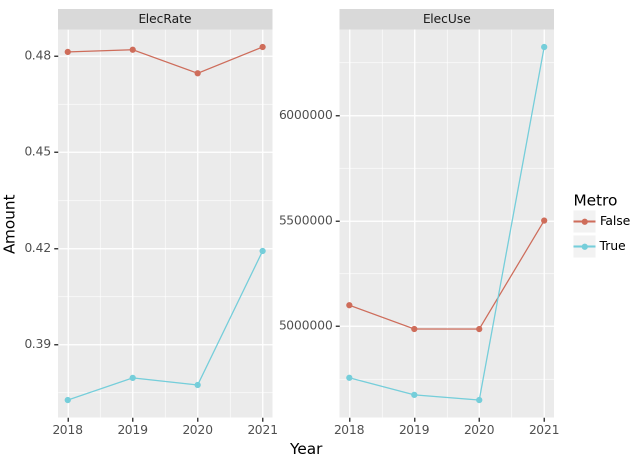

**세부지침**

`1`. `['Seoul','Gyeonggi-do','Incheon']`은 수도권으로 그 외의 지역은
비수도권으로 분리한다.

`2`. 수도권의 전기에너지 사용비율은 아래와 같이 구한다.

$$\text{2018년 수도권의 전기에너지 사용비율} = \frac{\text{2018년 수도권의 전기 사용량}}{\text{2018년 수도권의 전기 사용량}+\text{2018년 수도권의 도시가스 사용량}+\text{2018년 수도권의 지역난방 사용량}}$$

`3`. `facet_wrap` 사용시 `scales='free'` 옵션을 사용할 것

# 2. FIFA – 90점

아래는 FIFA22 자료를 불러오는 코드이다.

[1] type이 `plotnine.ggplot.ggplot` 인 오브젝트

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv').drop(['Loaned From','Marking'],axis=1).dropna()
df.head()

아래의 딕셔너리를 이용하여 `Position`열을 변환하고 물음에 답하라.

In [29]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

## `(1)` 나이와 포지션에 따른 선수 가치 및 급여 분석 – 10점

나이에 따른 선수가치(Value)와 급여(Wage)의 산점도를 포지션별로 시각화
하고 추세선을 그려라.

**시각화 예시**

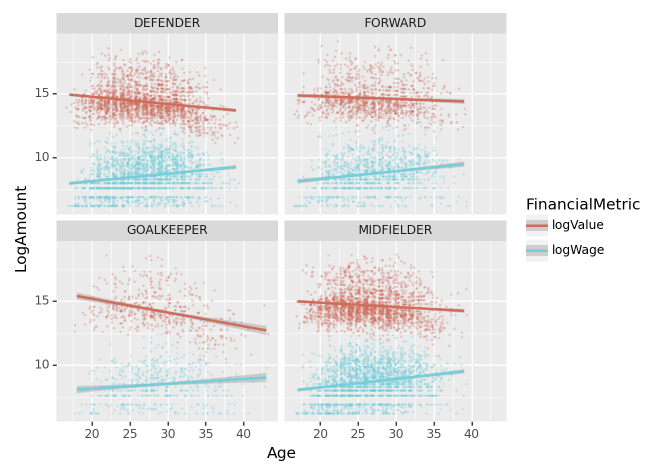

**세부지침**

`1`. `Value`와 `Wage`는 log값을 취하여 시각화 하라.

`2`. `geom_point`를 사용할 시`alpha=0.2`, `size=0.1`,
`position='jitter'`로 설정하라.

## `(2)` 골키퍼 능력치별 로그급여 추세 – 10점

아래의 리스트는 골키퍼와 관련된 능력치이다.

In [74]:
gkstats = ['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
gkstats

`gkstats` 에 해당하는 능력치와 로그급여(`logWage`)를 산점도로 시각화하고
추세선을 추가하라.

**시각화예시**

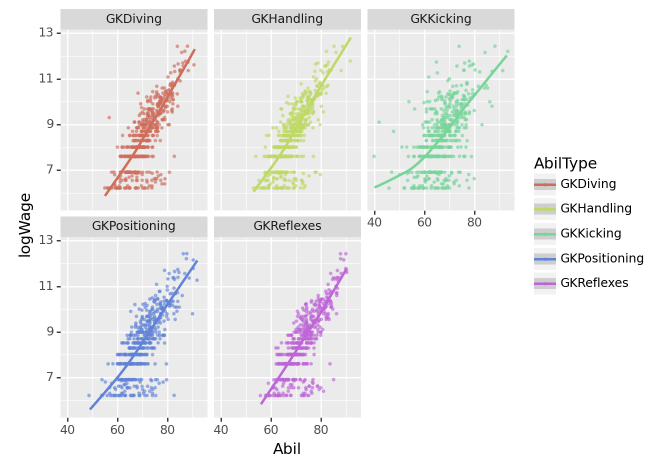

**세부지침**

`1`. 포지션이 “골키퍼”인 선수에 한정하여 시각화 할 것

`2`. `geom_point`를 사용할 시 `alpha=0.5`,`size=0.5`,`position='jitter'`
를 설정하라.

## `(3)` “GKAbility”에 따른 골키퍼의 Overall 예측 – 20점

아래의 리스트는 골키퍼와 관련된 능력치이다.

In [74]:
gkstats = ['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
gkstats

`gkstats` 에 해당하는 능력치의 평균을 계산하고 `GKAbility`라는 변수에
저장하라. 골키퍼 포지션과 공격수 포지션을 가지는 선수들에 한정하여
`GKAbility`와 `OveraAll`(=선수의 전반적 능력치)의 관계를 산점도로
시각화하라.

**시각화 예시**

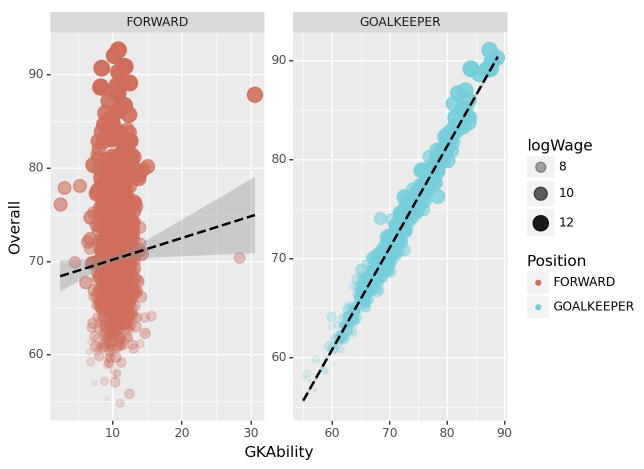

**세부지침**

`1`. `ID=212198`인 선수 `Bruno Fernandes`의 경우 `GKAbility`를 아래와
같이 계산할 수 있다.

$$\text{Bruno Fernandes의 GKAbility} = \frac{\text{Bruno Fernandes의 GKDiving} + \dots + \text{Bruno Fernandes의 GKReflexes}}{5}$$

`2`. 시각화를 위한 세부옵션은 아래의 코드를 참고하라.

``` python
fig = ggplot(tidydata)
point = geom_point(aes(x='GKAbility',y='Overall',size='logWage',alpha='logWage',color='Position'),position='jitter')
smooth = geom_smooth(aes(x='GKAbility',y='Overall'),linetype='dashed')
facet = facet_wrap('Position',scales='free')
fig + point + smooth + facet
```

## `(4)` 포워드와 수비수의 기술별 가치 평가 – 25점

아래는 축구선수의 능력치와 관련이 있는 column들의 리스트이다. (골키퍼
관련 능력치는 제외하였음)

In [100]:
abilities_list = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle']

아래는 위의 `abilities_list`을 적당한 카테고리로 묶은 것이다.

In [101]:
abilities_categories = {
    "FinishingSkills": ['Finishing', 'HeadingAccuracy', 'Volleys', 'LongShots', 'Positioning', 'Vision', 'Penalties', 'ShotPower', 'Jumping'],
    "BallControl_Passing": ['Dribbling', 'Curve', 'Crossing','ShortPassing', 'LongPassing', 'BallControl','FKAccuracy'],
    "Speed_Stamina": ['Acceleration', 'SprintSpeed', 'Agility', 'Stamina'],
    "Reactions_PhysicalAttributes": ['Reactions', 'Balance', 'Strength', 'Composure'],
    "DefensiveSkills": ['Aggression', 'Interceptions', 'StandingTackle', 'SlidingTackle']
}

선수들의 여러 능력치를 `abilities_categories`에 따라 통합하고 각 스킬
카테고리별로 선수의 능력치의 평균을 구하여 `SkillValueCategories`값에
저장하라. 정리된 자료의 예시는 아래와 같다.

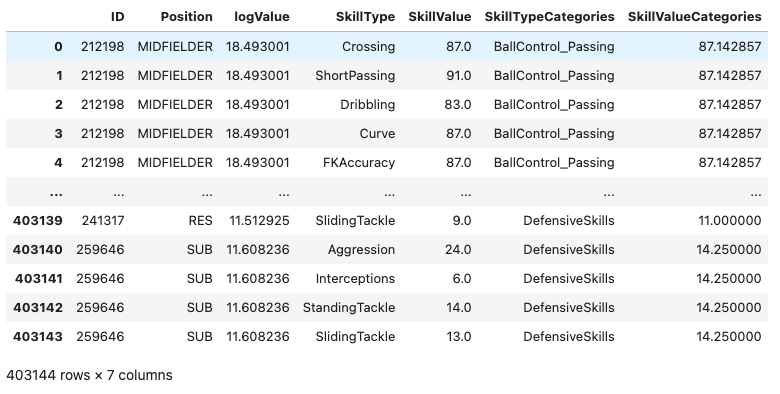

위의 자료를 바탕으로 `SkillValueCategories`와 `logValue`의 산점도를
포지션별로 시각화 하라.

**시각화 예시**

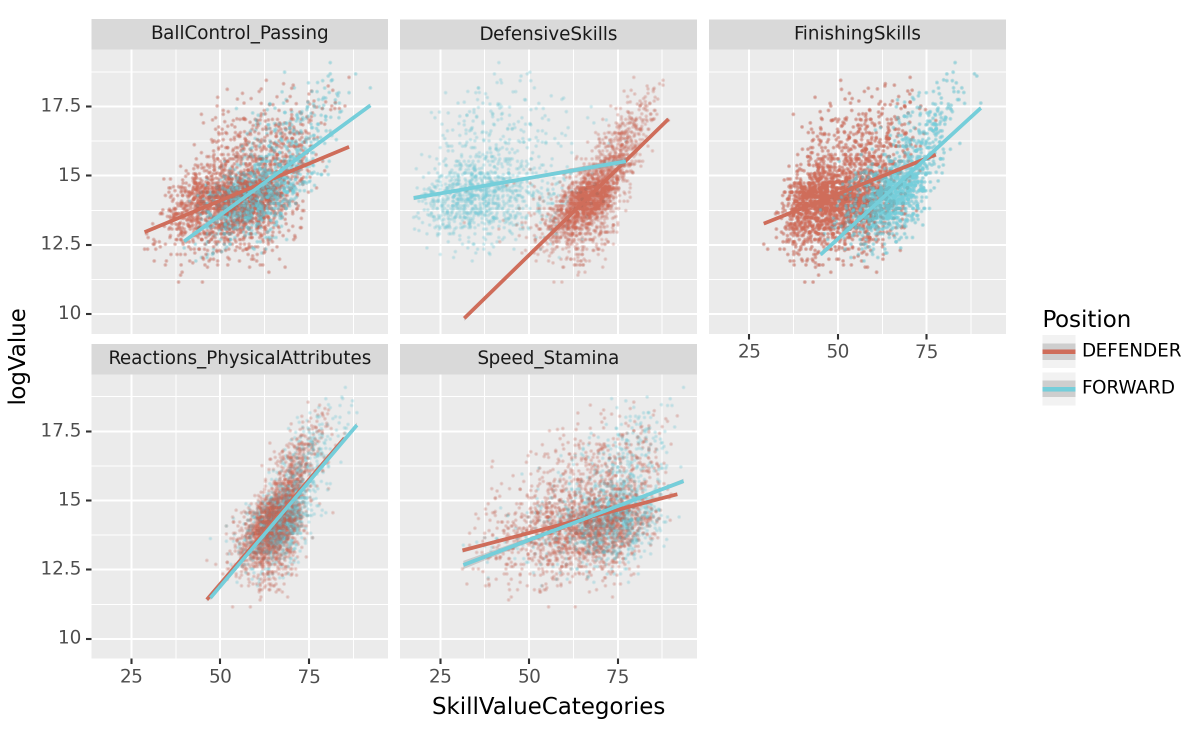

**힌트**

`-` 아래의 데이터프레임에서

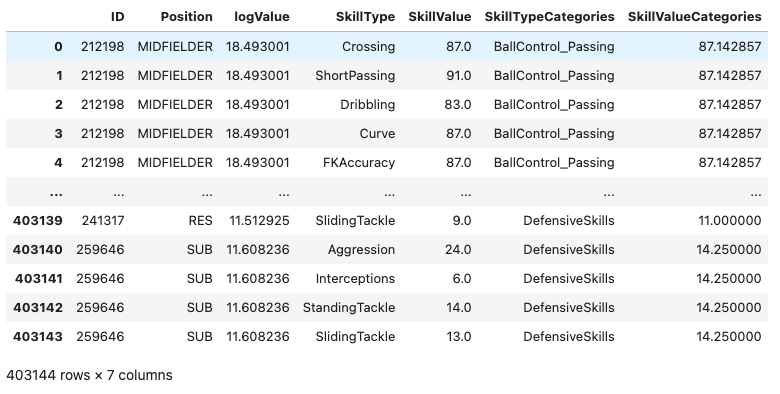

마지막 row의 SkillValueCategories의 값은 아래와 같이 구하였다.

$$14.250 = \frac{\text{259646선수의 Aggression}+\dots+\text{259646선수의 SlidingTackle}}{4}=\frac{24+6+14+13}{4} $$

In [106]:
(24+6+14+13)/4

`-` 시각화를 위해 아래의 코드를 참고하라.

``` python
fig = ggplot(tidydata.query("Position=='FORWARD' or Position=='DEFENDER'"))
point = geom_point(aes(x='SkillValueCategories',y='logValue',color='Position'),alpha=0.05,size=0.05)
smooth = geom_smooth(aes(x='SkillValueCategories',y='logValue',color='Position'))
facet = facet_wrap('SkillTypeCategories')
fig = (fig + point + smooth + facet).draw()
fig.set_dpi(150)
fig.set_size_inches(8,5)
fig
```

## `(5)` 스킬 카테고리별 선수의 로그 연봉 분석 – 25점

공격수 포지션을 가진 선수들의 특정 능력치가 그들의 Value에 얼마나 영향을
주는지 알아보고자 한다. 선수들의 logValue를 10개의 구간으로 나눈 후, 각
구간별로 \[‘FinishingSkills’,…,‘DefensiveSkills’\]의 통합능력치 평균을
바 플롯(bar plot)으로 시각화하라.

**시각화 예시**

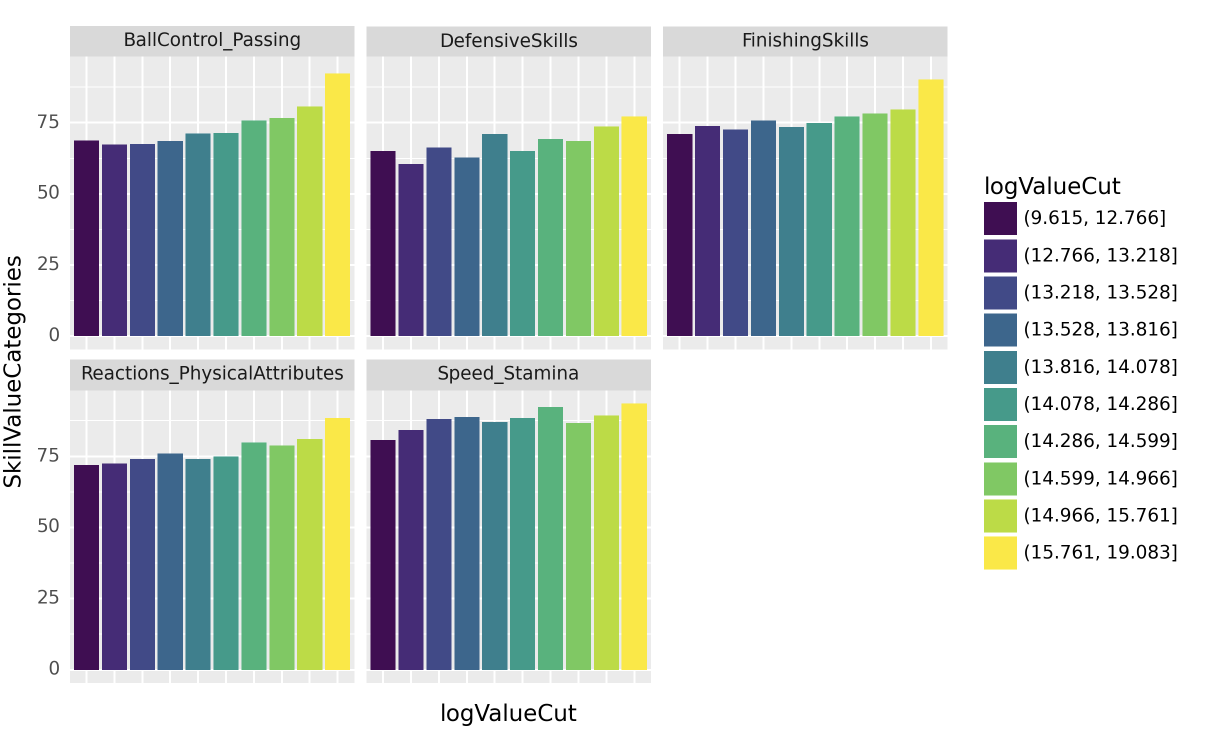

**세부지침**

`1`. `logValue`는 `pd.qcut`을 이용하여 분할하고 이때 `q=10`으로
설정하라.

`2`. 시각화를 위해 아래의 코드를 사용하라.

``` python
fig = ggplot(tidydata.query("Position=='FORWARD'")) 
col = geom_col(aes(x='logValueCut',y='SkillValueCategories',fill='logValueCut'),position='dodge')
facet = facet_wrap('SkillTypeCategories')
fig = (fig + col + facet + theme(axis_text_x=element_blank(), axis_ticks=element_blank())).draw()
fig.set_dpi(150)
fig.set_size_inches(8,5)
fig
```

# 3. 시각화의 해석 – 30점

## `(1)` 심슨의 역설 – 10점

다음은 농구선수 A,B 의 시즌별 자유투 성공률이다.

In [784]:
df = pd.DataFrame({
    'Player': ['A','A','A','A','B','B','B','B'], 
    'Season': [1,1,2,2]*2,
    'Status': ['Success','Failure']*4,
    'Count': [7,3,None,None,None,None,4,0]
})
df

적절한 값을 채워 시즌 1,2 모두 B선수의 자유투 성공률이 높지만 시즌1-2를
전체 합치면 A선수의 자유투 성공률이 더 높도록 하라. (즉 적절한 값을 채워
심슨의 역설을 설명하기 위한 자료를 구성하라.) 만들어진 자료를 바탕으로
심슨의 역설을 시각화하라. (즉 시즌별 자유투 성공률과 전체 자유투
성공률을 barplot으로 시각화하라)

## `(2)` Histogram Equalization – 5점

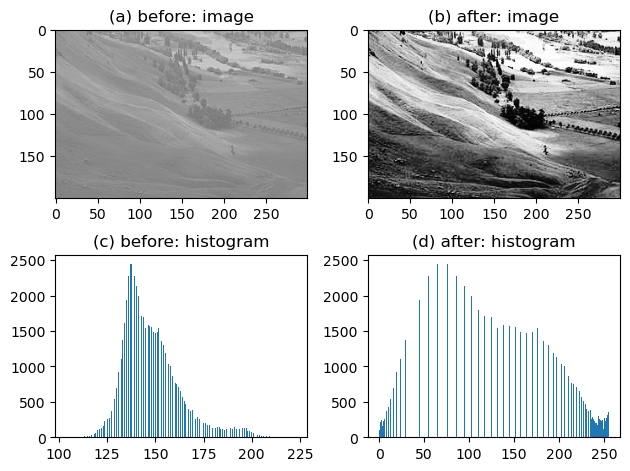

In [22]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Unequalized_Hawkes_Bay_NZ.jpg/300px-Unequalized_Hawkes_Bay_NZ.jpg'
img_before = np.array(PIL.Image.open(io.BytesIO(requests.get(url).content)))
img_after = cv2.equalizeHist(img_before)
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(img_before,cmap='gray',vmax=255,vmin=0); ax[0,0].set_title("(a) before: image")
ax[0,1].imshow(img_after,cmap='gray',vmax=255,vmin=0); ax[0,1].set_title("(b) after: image")
ax[1,0].hist(img_before.reshape(-1), bins=255); ax[1,0].set_title("(c) before: histogram")
ax[1,1].hist(img_after.reshape(-1), bins=255); ax[1,1].set_title("(d) after: histogram")
fig.tight_layout()

위의 그림을 올바르게 해석한 사람을 모두 고르라. (모두 맞출 경우만
정답으로 인정)

-   유진: (a) 이미지의 값들은 (b) 이미지의 값들 보다 분산이 작을 것이다.
-   레이: (a) 이미지의 값은 대부분 130~150근처에 모여있어서 회색으로
    보인다.
-   원영: 130~150 사이의 값들은 (b) 이미지 보다 (a) 이미지에서 훨씬 많은
    빈도로 나타난다.
-   리즈: (a) 이미지를 (b) 이미지로 바꾸는 기법을 histogram equalization
    이라고 하며, 그 원리는 (c)와 같은 히스토그램을 (d)와 같은
    히스토그램으로 바꾸는 것이다.

> 답안예시: 유진,레이

## `(3)` 엔스콤의 플랏 – 5점

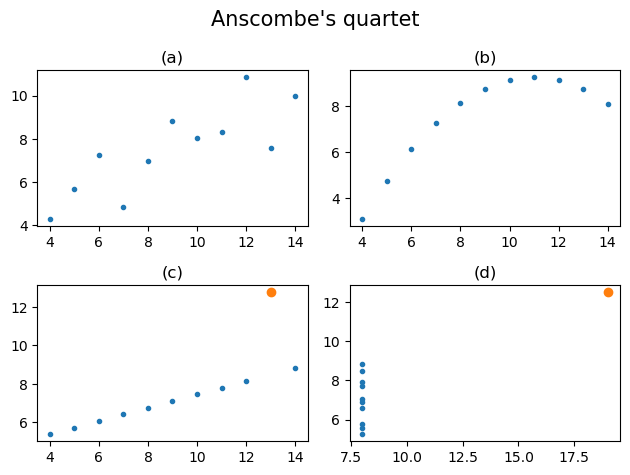

In [24]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(x,y1,'.') 
ax1.set_title("(a)")
ax2.plot(x,y2,'.') 
ax2.set_title("(b)")
ax3.plot(x,y3,'.'); ax3.plot(x[2],y3[2],'o',color='C1') 
ax3.set_title("(c)")
ax4.plot(x4,y4,'.'); ax4.plot(x4[-4],y4[-4],'o',color='C1')
ax4.set_title("(d)")
fig.suptitle("Anscombe's quartet",size=15)
plt.tight_layout()

위의 그림을 올바르게 해석한 사람을 모두 고르라. (모두 맞출경우만
정답으로 인정)

-   유진: (a)-(d) 모두 양의 상관계수를 가진다.
-   레이: 이 중 상관계수값의 해석이 가장 적절한 자료는 (a)이다.
-   원영: (b)가 적절하지 않은 이유는 선형성이 가정되어 있지 않기
    때문이며, (c)가 적절하지 않은 이유는 주황색점으로 표시된 점이
    계수값을 크게 바꾸기 때문이다.
-   리즈: (d)의 경우 주황색점의 값 $(x,y)$을 $(-x,y)$로 바꾸게 된다면
    상관계수의 부호가 음수가 될 것이다.

## `(4)` 아이스크림을 많이 먹으면 걸리는 병 – 5점

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence i

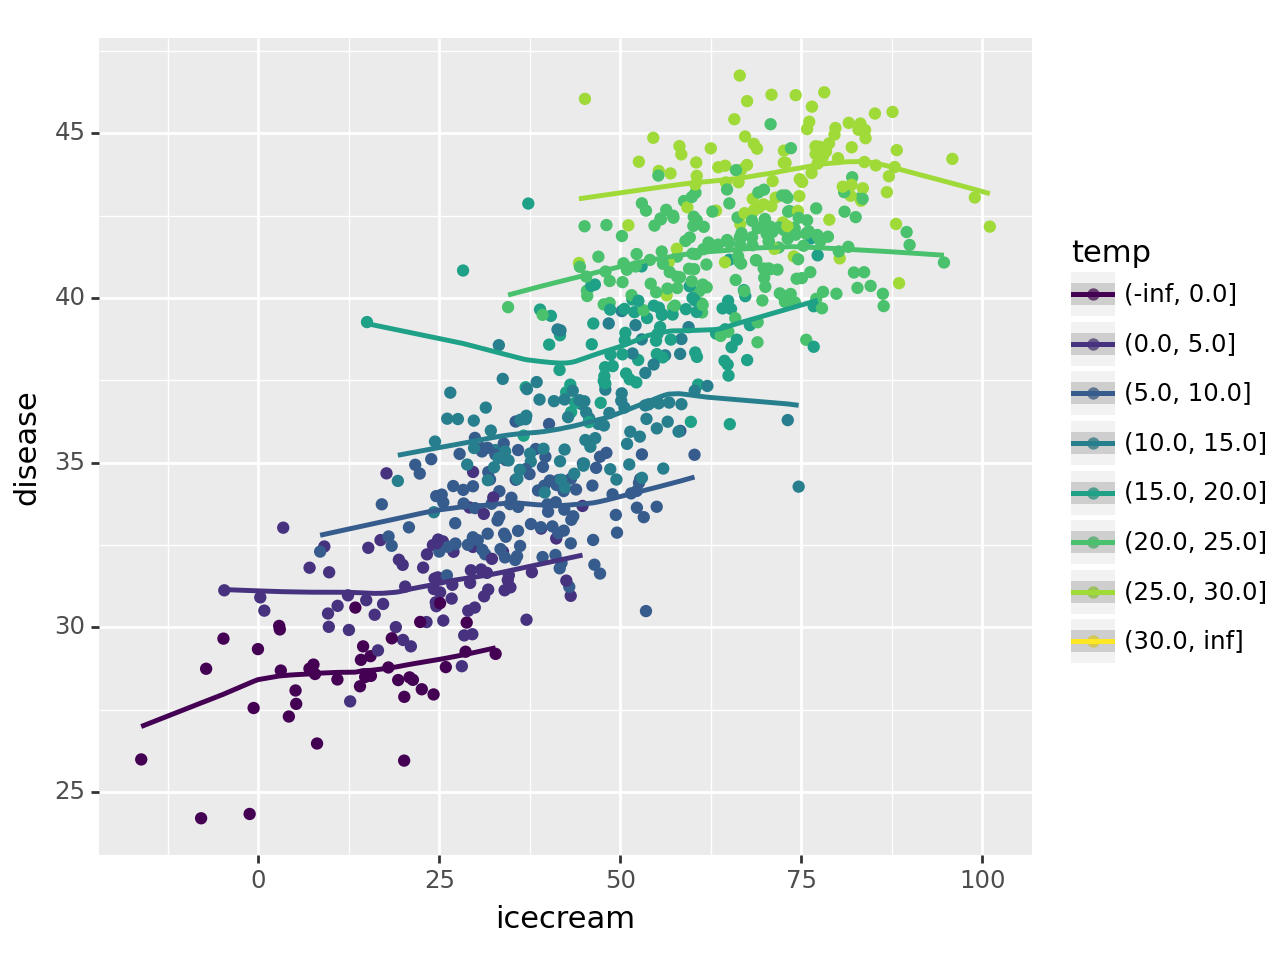

In [26]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/icecream.csv')
ggplot(data=df.assign(temp=pd.cut(df.temp,[-np.inf,0,5,10,15,20,25,30,np.inf])))\
+geom_point(aes(x='icecream',y='disease',color='temp'))\
+geom_smooth(aes(x='icecream',y='disease',color='temp'))

아래의 그림을 보고 올바르게 해석한 사람을 모두 고르라. (모두 맞출경우만
정답으로 인정)

> 그림에 대한 배경설명은 강의노트 “아이스크림을 많이 먹으면 걸리는 병”을
> 참고

-   원영: (아이스크림 판매량, 소아마비 반응수치)의 상관계수값은
    양수이다.
-   가을: 온도를 통제하였을 경우 (아이스크림 판매량, 소아마비
    반응수치)의 상관계수값은, 온도를 통제하지 않았을 경우 (아이스크림
    판매량, 소아마비 반응수치)의 상관계수 값보다 작다.
-   이서: (온도, 소아마비 반응수치)의 상관계수 값은 양수이다.
-   레이: (온도, 아이스크림 판매량)의 상관계수 값은 양수이다.
-   유진: 온도가 유일한 은닉변수라면, 아이스크림 판매량과 소아마비
    반응수치 사이에는 인과성이 없다고 볼 수 있다.

## `(5)` 산점도의 해석들 – 5점

아래는 `문제 4`에 제시된 산점도와 그 해석들이다. 옳은 해석을 모두
골라라.

> 답안예시: 해석1,해석2,해석3

**4-(1)**

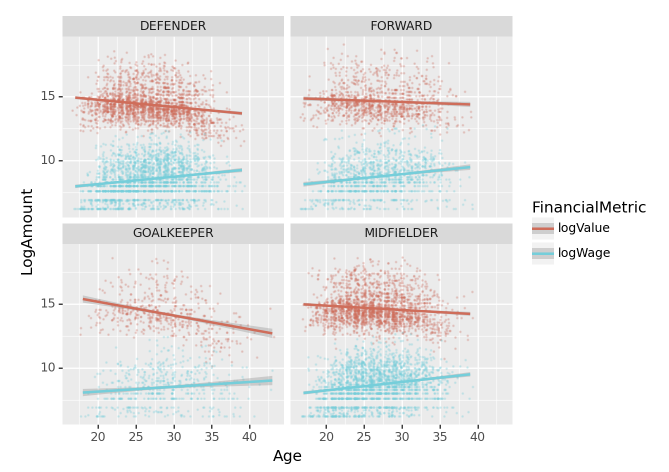

`해석1`: 모든 포지션에 대하여, (Age,logValue)는 음의 상관계수값을 가지며
(Age,logWage)는 양의 상관계수값을 가진다.

**4-(2)**

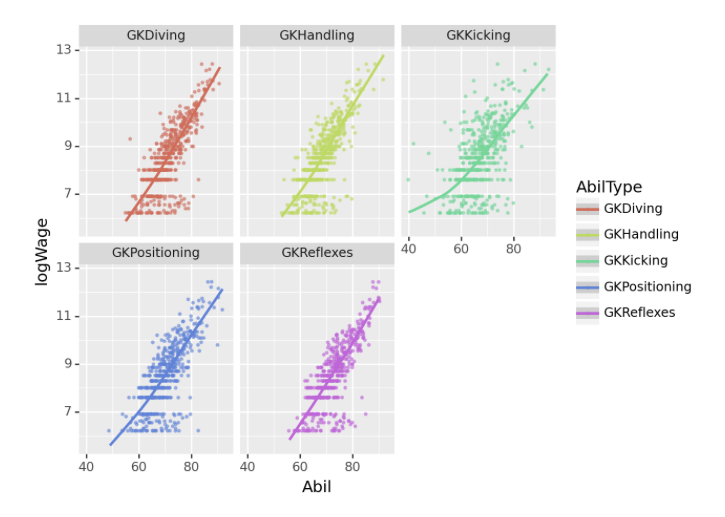

`해석2`: \[GKDiving,…,GKReflexes\]는 모두 logWage와 양의 상관계수값을
가진다.

**4-(3)**

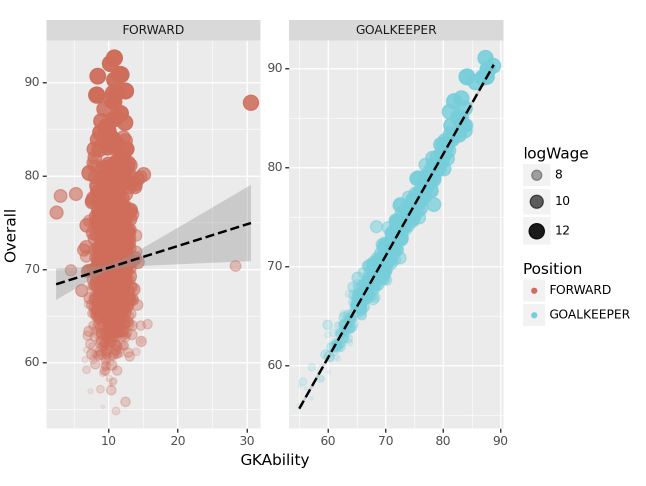

`해석3`: GOALKEEPER 포지션의 경우 GKAbility를 이용하여 Overall을
추정하는 것이 합리적이지만 FORWARD 포지션의 경우 GKAbility를 이용하여
Overall을 추정하는 것은 합리적이지 않다.

**4-(4)**

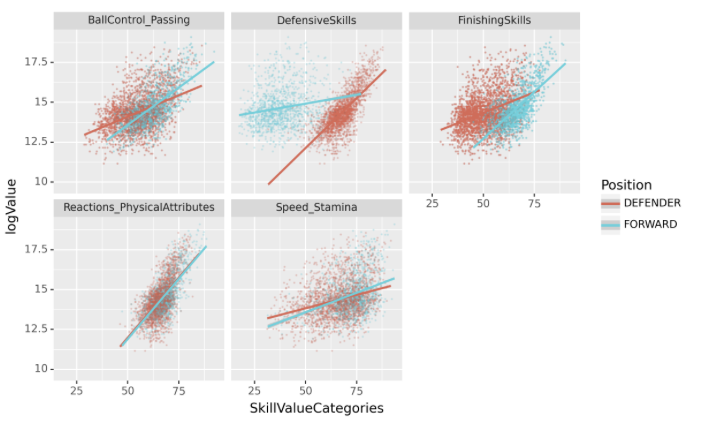

`해석4`: 수비수 포지션의 경우 FinishingSkills 과 logValue 사이의
상관계수 값은 거의 0에 가깝다.